In [17]:
import tensorflow as tf

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import os

In [19]:
tf.__version__

'2.8.0'

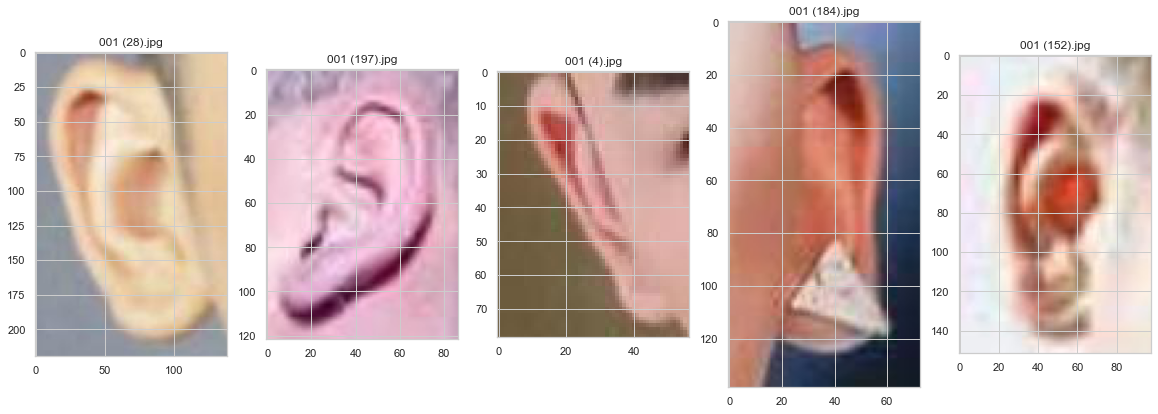

In [20]:
plt.figure(figsize=(20,20))
test_folder="../../Dataset/EarVN1.0 dataset/split_dataset/train/001.ALI_HD/"
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [21]:
CATE_DATASET_PATH = "../../Dataset/EarVN1.0 dataset/split_dataset/train/"
categories = os.listdir(CATE_DATASET_PATH)
print(len(categories))

164


In [22]:
import pandas as pd

def get_data_info(path):
    categories = os.listdir(path)
    df_categories = []
    df_categories_image_number = []
    for cate in categories:
        df_categories.append(cate)
        image_num = len(os.listdir(os.path.join(path, cate)))
        df_categories_image_number.append(image_num)
        
    df = pd.DataFrame()
    df["category"] = df_categories
    df["image_num"] = df_categories_image_number
    return df

In [23]:
info = get_data_info(CATE_DATASET_PATH)
info

,category,image_num
0,016.Dang_L,133
1,015.Dan_Trg,164
2,094.Tuan_Hu,134
3,022.Duy_Kh,162
4,119.Kim_Ph,126
...,...,...
159,002.LeDuong_BL,239
160,075.Rym,132
161,122.La_Thanh_H,127
162,081.Thanh_D,137


In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(100, 200))
ax = sns.barplot(x="image_num", y="category", data=info)

In [25]:
info.max()

category     164.Yen_Nhi_H
image_num              239
dtype: object

In [26]:
info.min()

category     001.ALI_HD
image_num            90
dtype: object

In [27]:
MAX = 300
cate_not_max = info[info['image_num'] < MAX]['category']

In [28]:
cate_not_max

0          016.Dang_L
1         015.Dan_Trg
2         094.Tuan_Hu
3          022.Duy_Kh
4          119.Kim_Ph
            ...      
159    002.LeDuong_BL
160           075.Rym
161    122.La_Thanh_H
162       081.Thanh_D
163    029.Ho_Trung_D
Name: category, Length: 164, dtype: object

In [29]:
from skimage import io, exposure
from skimage.transform import rotate
from skimage.util import random_noise
import scipy.ndimage as ndi
from skimage.exposure import adjust_gamma
from skimage import img_as_ubyte
import numpy as np

# random rotation
# blur 20%
# Gaussian noise
# brightness
# flipped horizontally

def augment(image_path):
    img = io.imread(image_path)
    
    #rotation (-15, 15)
    rotate(img, random.randint(-15,15), mode="edge")
    
    if random.uniform(0, 1) < 0.2:
        alpha = random.randint(0,5)
        img = ndi.uniform_filter(img, size=(alpha, alpha, 1))
    
    var_noise = random.randint(1,5) * 0.0001
    img = random_noise(img, var=var_noise)
    
    brightness_param = random.uniform(0.8, 1.3)
    img = adjust_gamma(img, brightness_param)
    
    if random.uniform(0, 1) < 0.5:
        img= np.fliplr(img)
    
    return img
    

In [30]:
%%capture
from tqdm import tqdm_notebook as tqdm
import time
tqdm().pandas()

In [32]:
AUG_DATASET_PATH = "../../Dataset/EarVN1.0 dataset/aug_dataset_300/train/"

with tqdm(total=len(cate_not_max), desc ="Augmentation") as pbar:
    for cate in cate_not_max:
        path = os.path.join(CATE_DATASET_PATH, cate)
        img_num = info[info['category'] == cate]['image_num'].values[0]
        # need_fill = MAX - img_num
        
        # print(MAX)
        
        # breakx
        print(path)
        for idx in range(img_num + 1, MAX + 1):
            print(idx, MAX)
            image_name = random.choice(os.listdir(path))
            image_path = os.path.join(CATE_DATASET_PATH, cate, image_name)
            image_aug = augment(image_path)

            image_aug_name = cate[0:3] + " " + "(" + str(idx) + ")" + ".jpg"

            image_aug_path = os.path.join(AUG_DATASET_PATH, cate, image_aug_name)
            io.imsave(image_aug_path, img_as_ubyte(image_aug))
        
        pbar.update(1)
        

/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_16887/4278342453.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=len(cate_not_max), desc ="Augmentation") as pbar:


Augmentation:   0%|          | 0/164 [00:00<?, ?it/s]

../../Dataset/EarVN1.0 dataset/split_dataset/train/016.Dang_L
134 300
135 300
136 300
137 300
138 300
139 300
140 300
141 300
142 300
143 300
144 300
145 300
146 300
147 300
148 300
149 300
150 300
151 300
152 300
153 300
154 300
155 300
156 300
157 300
158 300
159 300
160 300
161 300
162 300
163 300
164 300
165 300
166 300
167 300
168 300
169 300
170 300
171 300
172 300
173 300
174 300
175 300
176 300
177 300
178 300
179 300
180 300
181 300
182 300
183 300
184 300
185 300
186 300
187 300
188 300
189 300
190 300
191 300
192 300
193 300
194 300
195 300
196 300
197 300
198 300
199 300
200 300
201 300
202 300
203 300
204 300
205 300
206 300
207 300
208 300
209 300
210 300
211 300
212 300
213 300
214 300
215 300
216 300
217 300
218 300
219 300
220 300
221 300
222 300
223 300
224 300
225 300
226 300
227 300
228 300
229 300
230 300
231 300
232 300
233 300
234 300
235 300
236 300
237 300
238 300
239 300
240 300
241 300
242 300
243 300
244 300
245 300
246 300
247 300
248 300
249 300
250 300
25

/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_16887/4278342453.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_300/train/005.Bui_AT/005 (176).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


177 300
178 300
179 300
180 300
181 300
182 300
183 300
184 300
185 300
186 300
187 300
188 300
189 300
190 300
191 300
192 300
193 300
194 300
195 300
196 300
197 300
198 300
199 300
200 300
201 300
202 300
203 300
204 300
205 300
206 300
207 300
208 300
209 300
210 300
211 300
212 300
213 300
214 300
215 300
216 300
217 300
218 300
219 300
220 300
221 300
222 300
223 300
224 300
225 300
226 300
227 300
228 300
229 300
230 300
231 300
232 300
233 300
234 300
235 300
236 300
237 300
238 300
239 300
240 300
241 300
242 300
243 300
244 300
245 300
246 300
247 300
248 300
249 300
250 300
251 300
252 300
253 300
254 300
255 300
256 300
257 300
258 300
259 300
260 300
261 300
262 300
263 300
264 300
265 300
266 300
267 300
268 300
269 300
270 300
271 300
272 300
273 300
274 300
275 300
276 300
277 300
278 300
279 300
280 300
281 300
282 300
283 300
284 300
285 300
286 300
287 300
288 300
289 300
290 300
291 300
292 300
293 300
294 300
295 300
296 300
297 300
298 300
299 300
300 300
../../Da

/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_16887/4278342453.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_300/train/164.Yen_Nhi_H/164 (261).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


270 300
271 300
272 300
273 300
274 300
275 300
276 300
277 300
278 300
279 300
280 300
281 300
282 300
283 300
284 300
285 300
286 300
287 300
288 300
289 300
290 300
291 300
292 300
293 300
294 300
295 300
296 300
297 300
298 300
299 300
300 300
../../Dataset/EarVN1.0 dataset/split_dataset/train/067.Pham_Hong_Ph
129 300
130 300
131 300
132 300
133 300
134 300
135 300
136 300
137 300
138 300
139 300
140 300
141 300
142 300
143 300
144 300
145 300
146 300
147 300
148 300
149 300
150 300
151 300
152 300
153 300
154 300
155 300
156 300
157 300
158 300
159 300
160 300
161 300
162 300
163 300
164 300
165 300
166 300
167 300
168 300
169 300
170 300
171 300
172 300
173 300
174 300
175 300
176 300
177 300
178 300
179 300
180 300
181 300
182 300
183 300
184 300
185 300
186 300
187 300
188 300
189 300
190 300
191 300
192 300
193 300
194 300
195 300
196 300
197 300
198 300
199 300
200 300
201 300
202 300
203 300
204 300
205 300
206 300
207 300
208 300
209 300
210 300
211 300
212 300
213 300
214 

In [33]:
info = get_data_info(AUG_DATASET_PATH)
info

,category,image_num
0,016.Dang_L,275
1,015.Dan_Trg,269
2,094.Tuan_Hu,275
3,022.Duy_Kh,268
4,119.Kim_Ph,269
...,...,...
159,002.LeDuong_BL,248
160,075.Rym,278
161,122.La_Thanh_H,273
162,081.Thanh_D,275


In [34]:
info[info['category'] == '002.LeDuong_BL']['image_num'].values[0]

248